<a href="https://colab.research.google.com/github/NehaNeha417/loan_prediction/blob/master/Bank_market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [95]:
creditcard_df = pd.read_csv('marketing_data.csv')

In [96]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [97]:
creditcard_df.shape

(8950, 18)

In [98]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [99]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [100]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [101]:
type(creditcard_df)

pandas.core.frame.DataFrame

In [102]:
creditcard_df.MINIMUM_PAYMENTS.fillna(creditcard_df.MINIMUM_PAYMENTS.mean(),inplace=True)
creditcard_df.CREDIT_LIMIT.fillna(creditcard_df.CREDIT_LIMIT.mean(),inplace=True)

In [103]:
type(creditcard_df)

pandas.core.frame.DataFrame

In [104]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [105]:
creditcard_df.drop(['CUST_ID'],axis=1,inplace=True)

In [106]:
type(creditcard_df)

pandas.core.frame.DataFrame

In [107]:
n = len(creditcard_df.columns)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

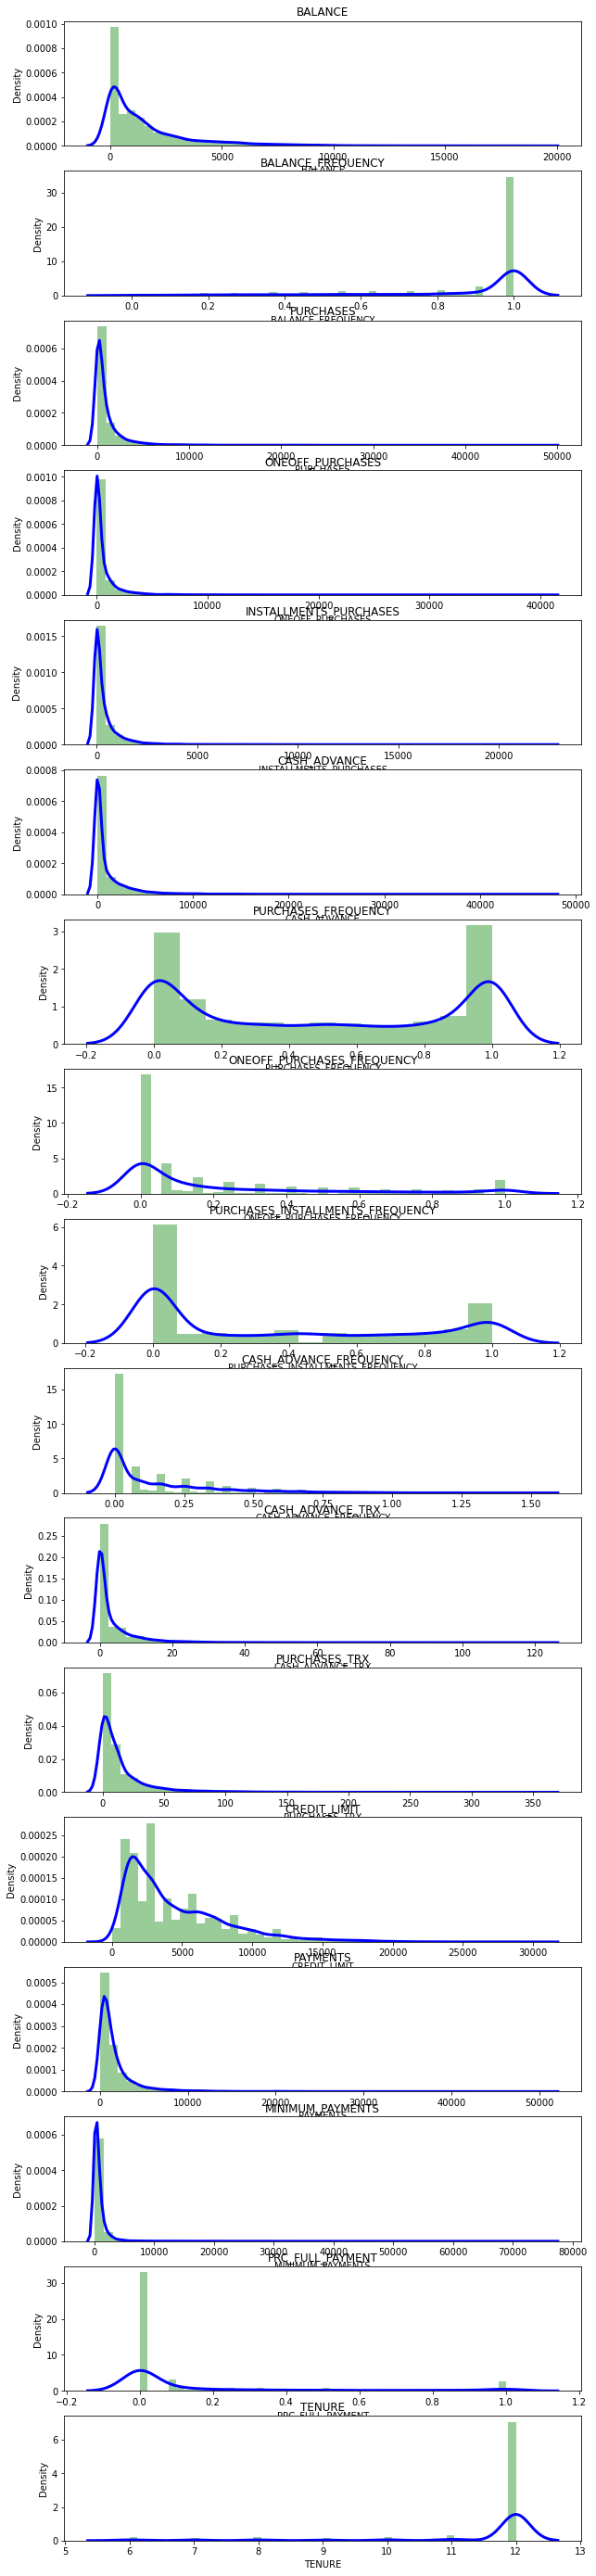

In [108]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'b', 'lw':3,'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])

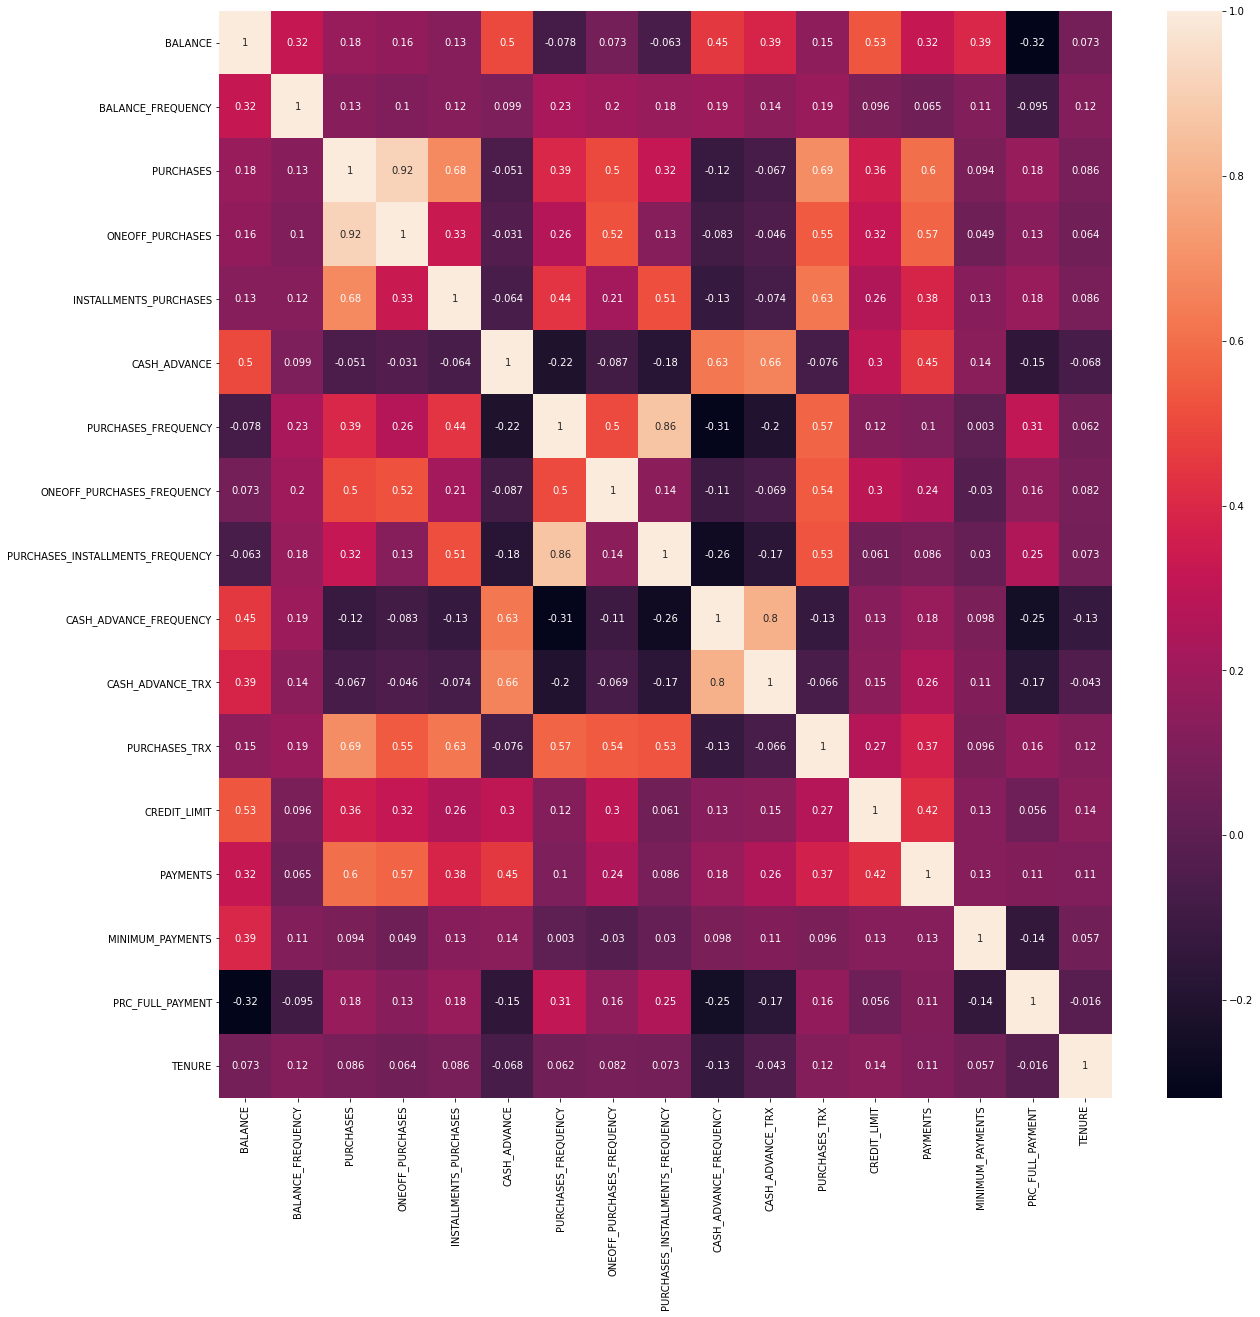

In [109]:
correlation = creditcard_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot = True)

In [110]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [111]:
creditcard_df_scaled.shape

(8950, 17)

In [112]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

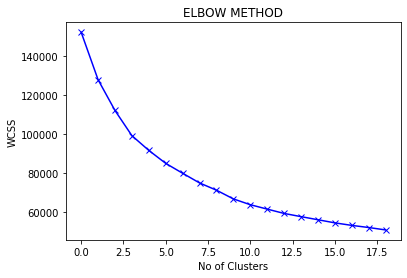

In [116]:
scores_1 = []
value = range(1,20)
for i in value:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)                   #inertia_ is used to calculate WCSS
plt.plot(scores_1, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [117]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [125]:
labels.shape

(8950,)

In [118]:
kmeans.cluster_centers_.shape                # it will give centroid of all different clusters

(8, 17)

In [120]:
cluster_df = pd.DataFrame(data=kmeans.cluster_centers_,columns = creditcard_df.columns)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.400423,0.307758,-0.058367,-0.256129,0.332506,-0.364785,0.998059,-0.410209,1.194292,-0.470809,-0.363254,0.145545,-0.322283,-0.244506,-0.063492,0.374309,-0.030699
1,1.818623,0.318581,0.073231,0.077879,0.029743,4.435871,-0.200967,0.026548,-0.150312,2.510569,3.771640,0.021480,1.393875,3.185684,0.585177,-0.162065,0.057113
2,-0.109532,0.368532,-0.352506,-0.235729,-0.400304,-0.166880,-0.834297,-0.374772,-0.752499,0.007194,-0.112067,-0.478727,-0.401464,-0.292224,-0.081582,-0.451705,0.032237
3,-0.143875,0.392966,0.540785,0.661354,0.063456,-0.329955,0.985300,1.872819,0.207782,-0.406995,-0.329911,0.625184,0.426400,0.144070,-0.163166,0.436744,0.205592
4,-0.698456,-2.146073,-0.317642,-0.236583,-0.316312,-0.308288,-0.564493,-0.436168,-0.458066,-0.481821,-0.360869,-0.427367,-0.212114,-0.223657,-0.254921,0.254908,-0.162854
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
6,1.323008,0.377379,-0.299436,-0.214413,-0.314145,1.193107,-0.620173,-0.306980,-0.541428,1.572691,1.217033,-0.371215,0.690735,0.188214,0.477559,-0.444239,-0.166669
7,1.049191,0.465598,2.481152,1.788989,2.579970,-0.160323,1.163655,1.541876,1.271066,-0.279918,-0.158915,3.105451,1.289088,1.384177,0.592747,0.242458,0.337784


In [121]:
cluster_df = scaler.inverse_transform(cluster_df)           # to get the original values

In [124]:
cluster_df = pd.DataFrame(data=cluster_df, columns = creditcard_df.columns)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,731.027355,0.950176,878.502631,167.315784,711.748391,213.899551,0.890920,0.080084,0.839079,0.040930,0.769882,18.327529,3321.853357,1025.323425,716.241316,0.263194,11.476235
1,5349.784647,0.952740,1159.663750,721.699750,437.964000,10281.100382,0.409693,0.210377,0.304700,0.637535,28.987500,15.243750,9565.937500,10955.387025,2227.935844,0.106313,11.593750
2,1336.494205,0.964573,250.070553,201.176035,49.078079,628.915774,0.155507,0.090656,0.065375,0.136584,2.484050,2.810460,3033.759891,887.183915,674.082717,0.021599,11.560460
3,1265.011532,0.970361,2158.599666,1690.149202,468.450463,286.939196,0.885799,0.761156,0.447015,0.053700,0.997427,30.249571,6045.865430,2150.213428,483.955484,0.281455,11.792453
4,110.697359,0.368886,324.558406,199.758227,125.030972,332.376221,0.263792,0.072340,0.182390,0.038727,0.786159,4.087092,3722.693541,1085.678371,270.124630,0.228271,11.299378
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
6,4318.204454,0.966668,363.455789,236.555172,126.990194,3480.872340,0.241445,0.110880,0.149260,0.449856,11.554185,5.482819,7007.625150,2278.004353,1977.138774,0.023782,11.294273
7,3748.277753,0.987566,6304.223788,3561.792423,2744.102674,642.666720,0.957382,0.662429,0.869591,0.079130,2.164345,91.899721,9184.679666,5740.201808,2245.578330,0.224629,11.969359


In [128]:
y_kmeans = kmeans.fit_predict(creditcard_df)
y_kmeans

array([0, 7, 1, ..., 0, 0, 0], dtype=int32)

In [133]:
creditcard_df_new = pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)

In [134]:
creditcard_df_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


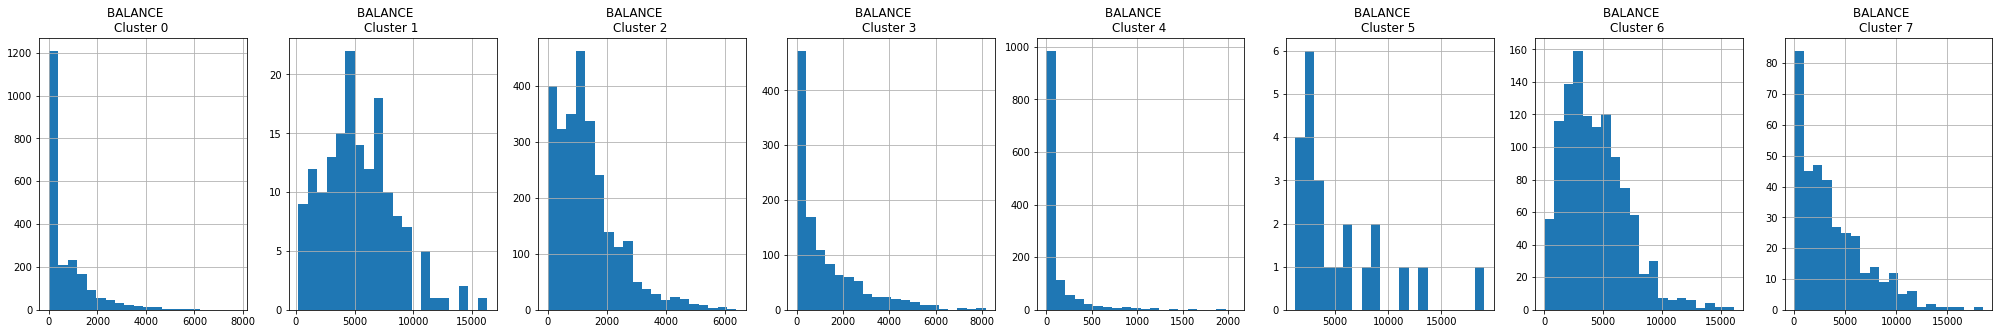

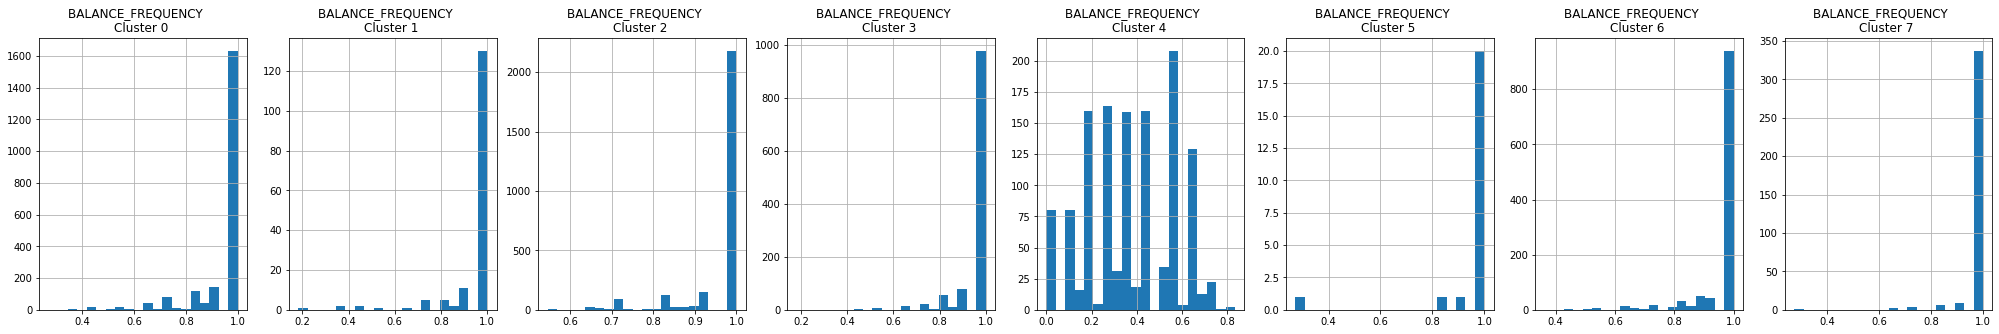

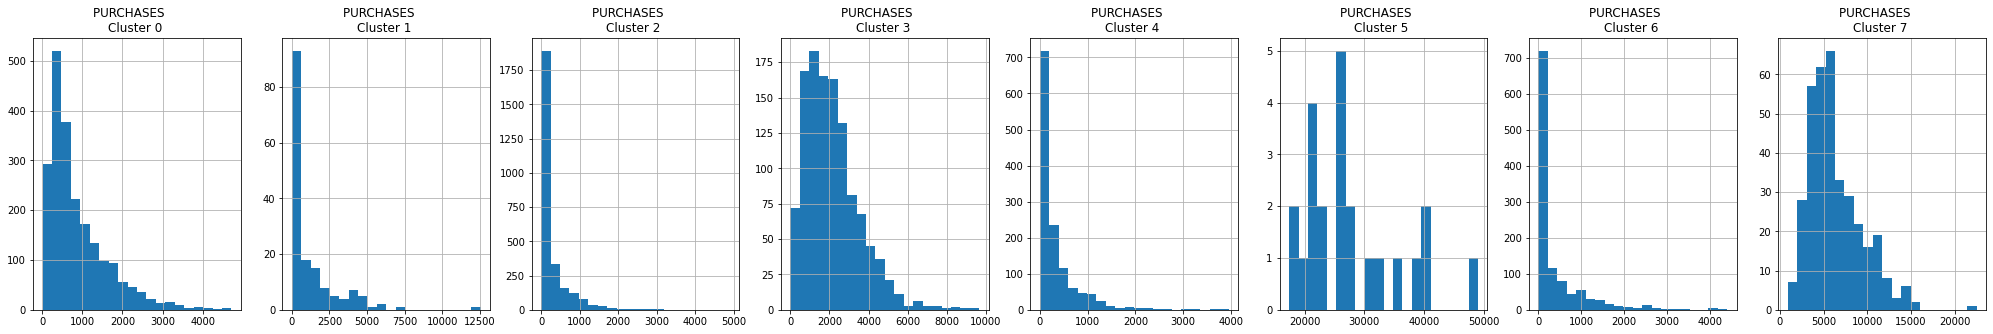

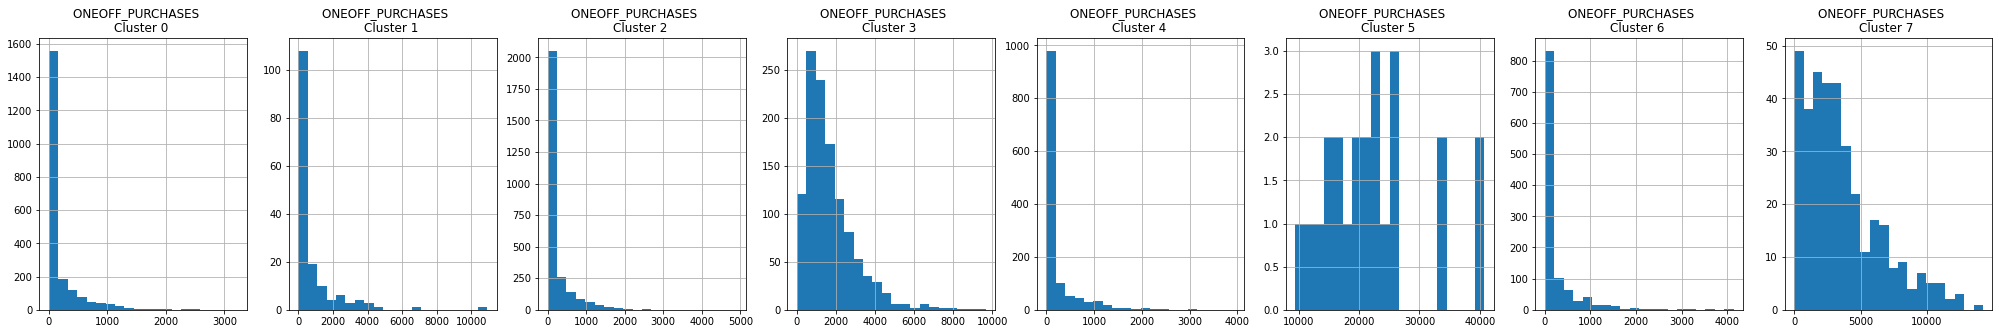

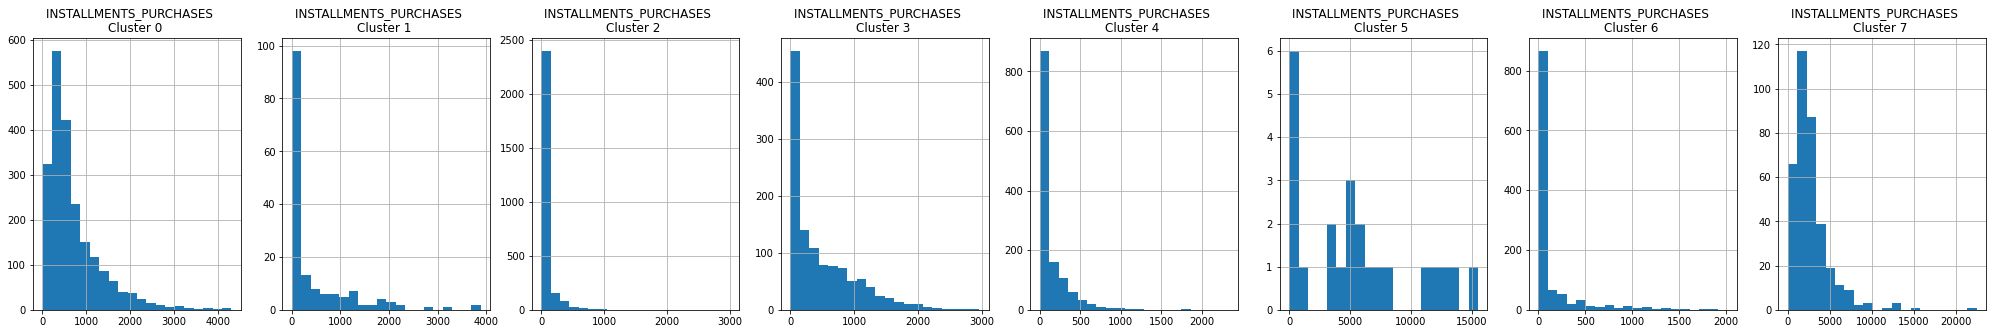

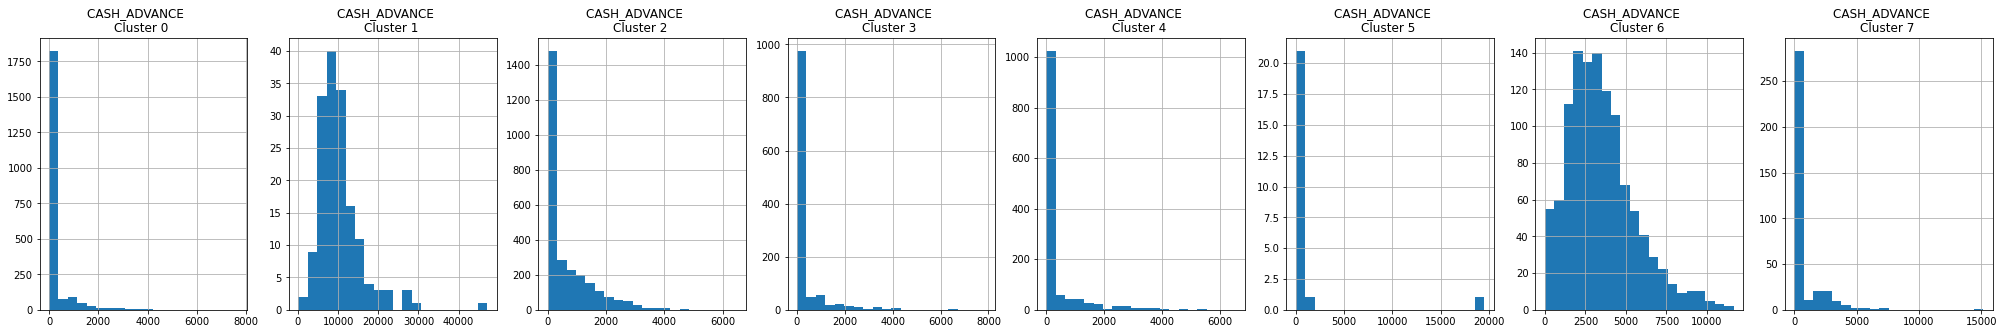

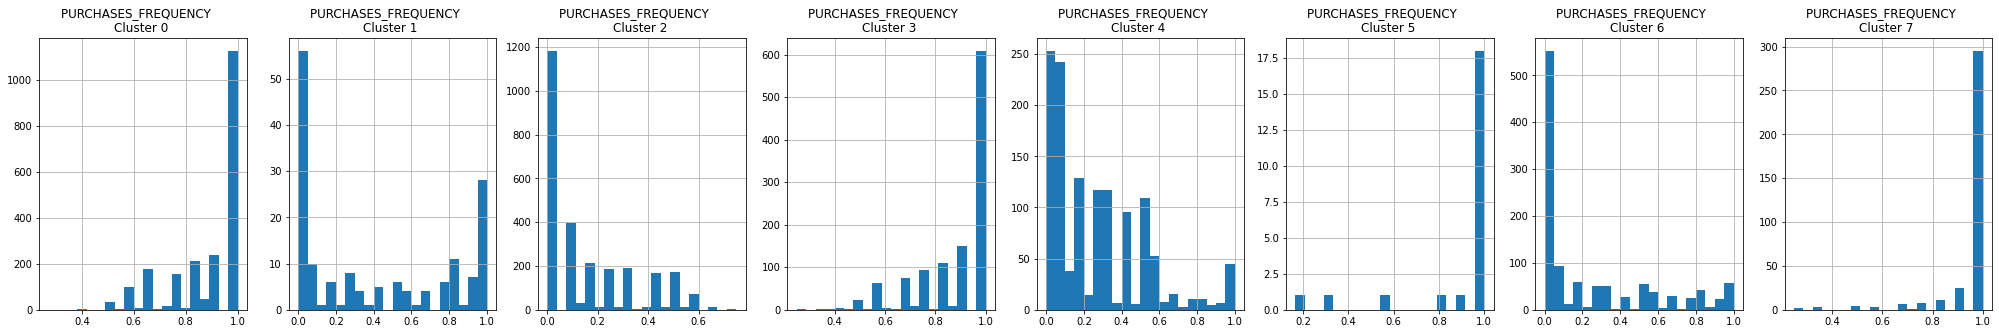

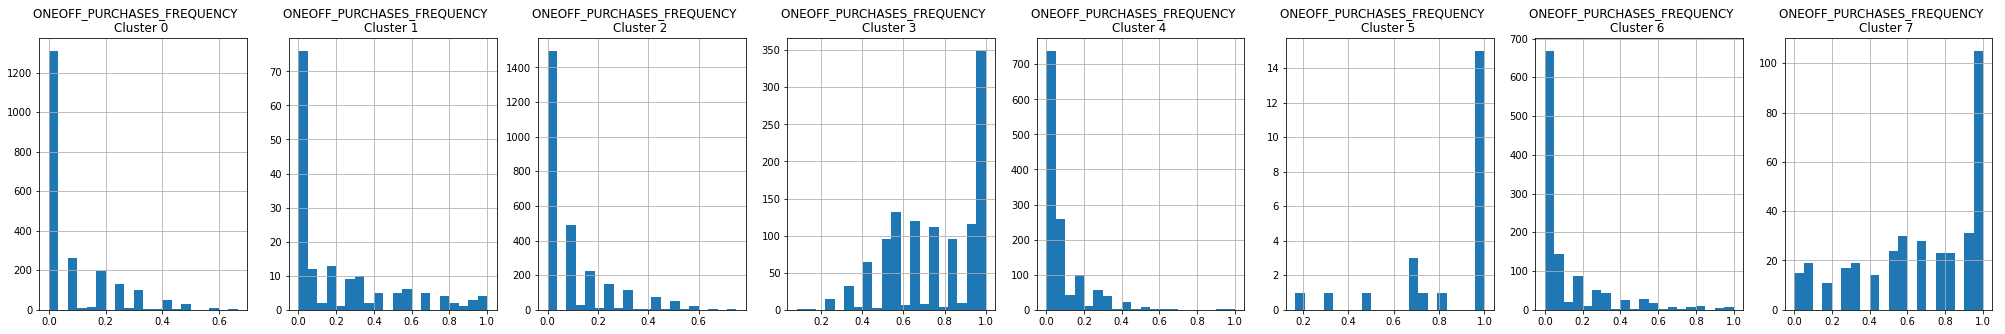

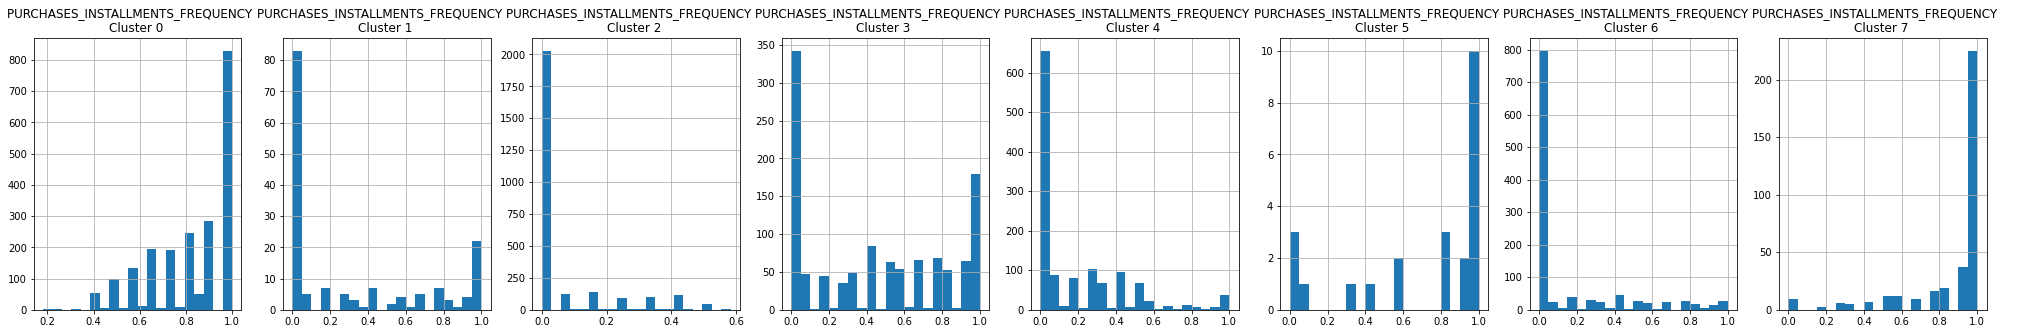

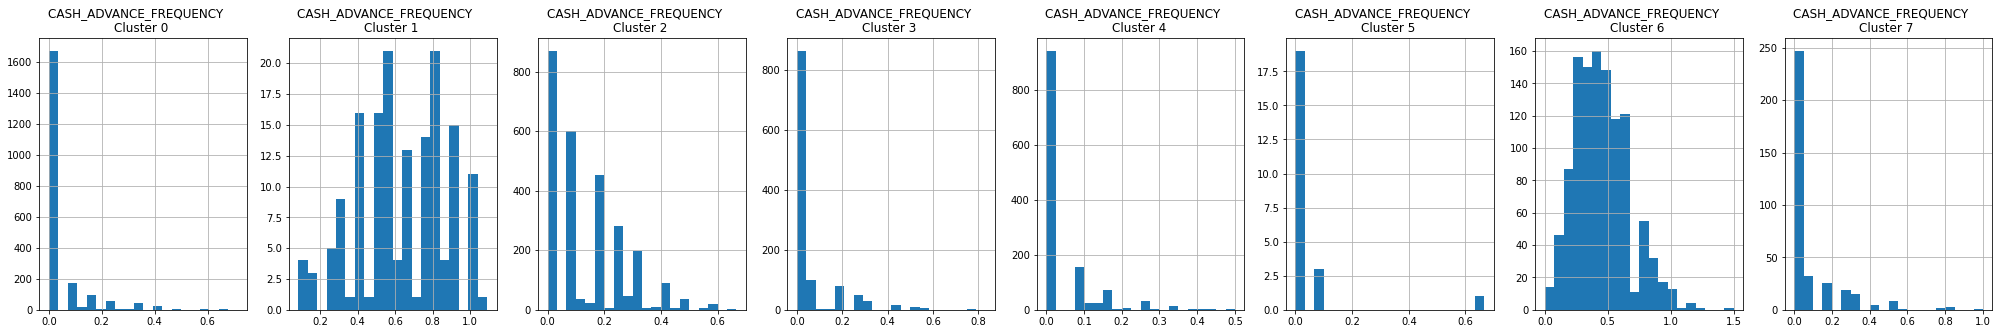

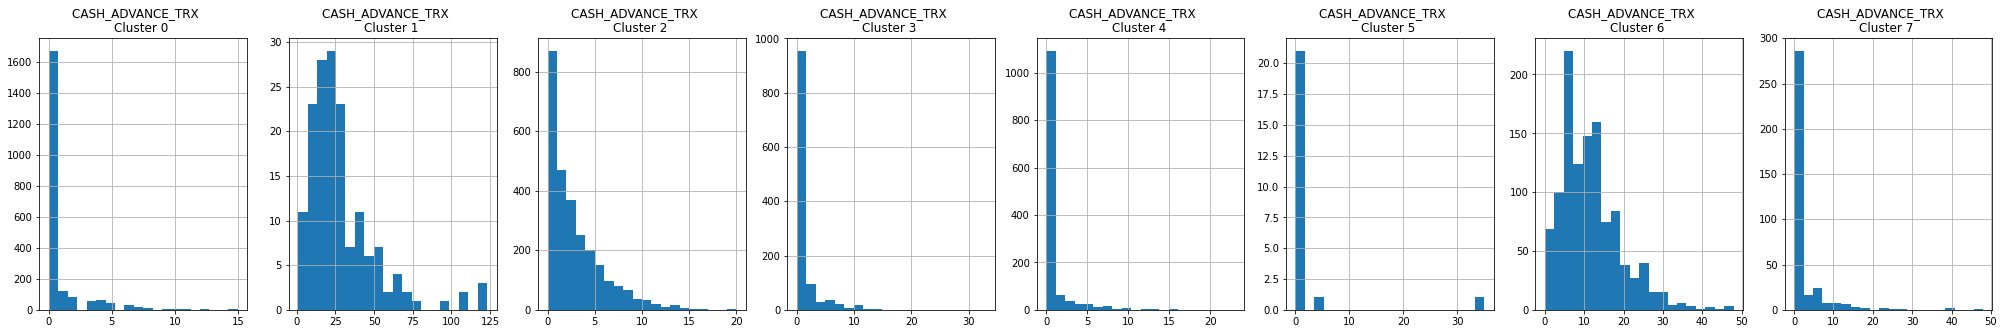

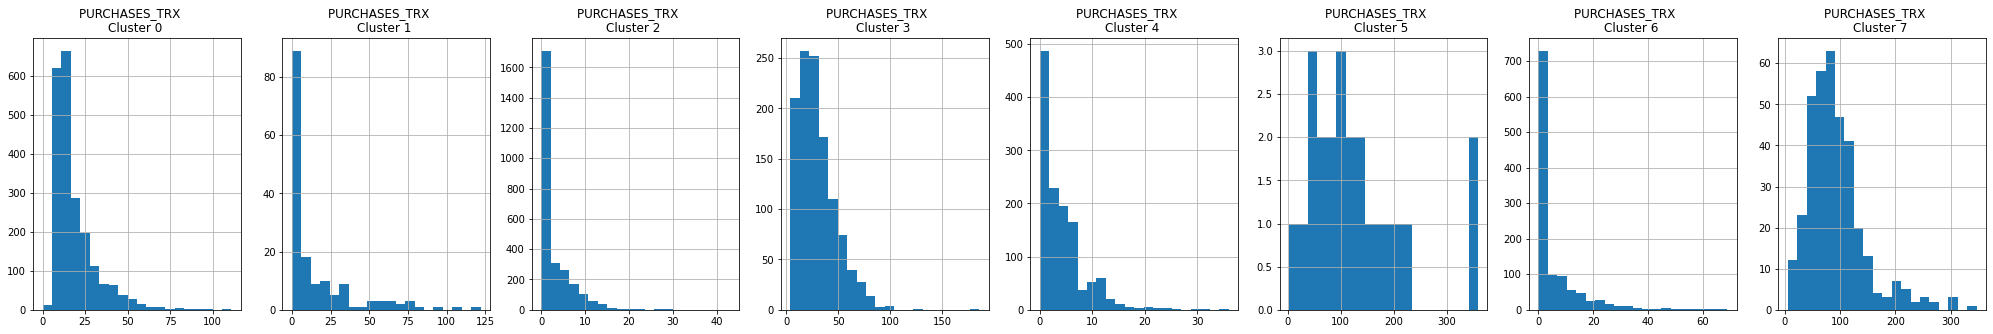

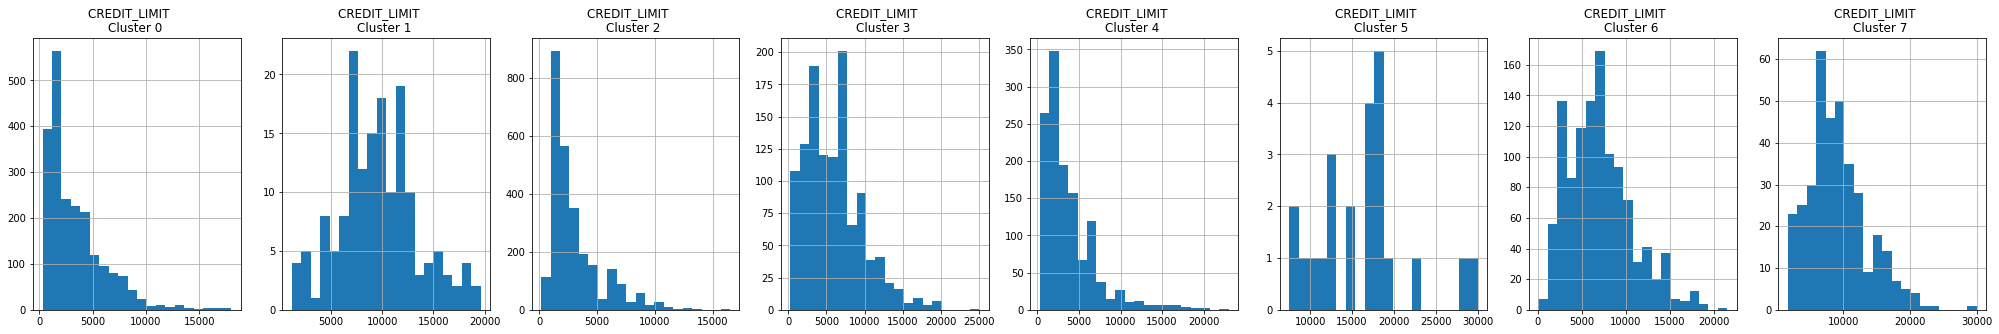

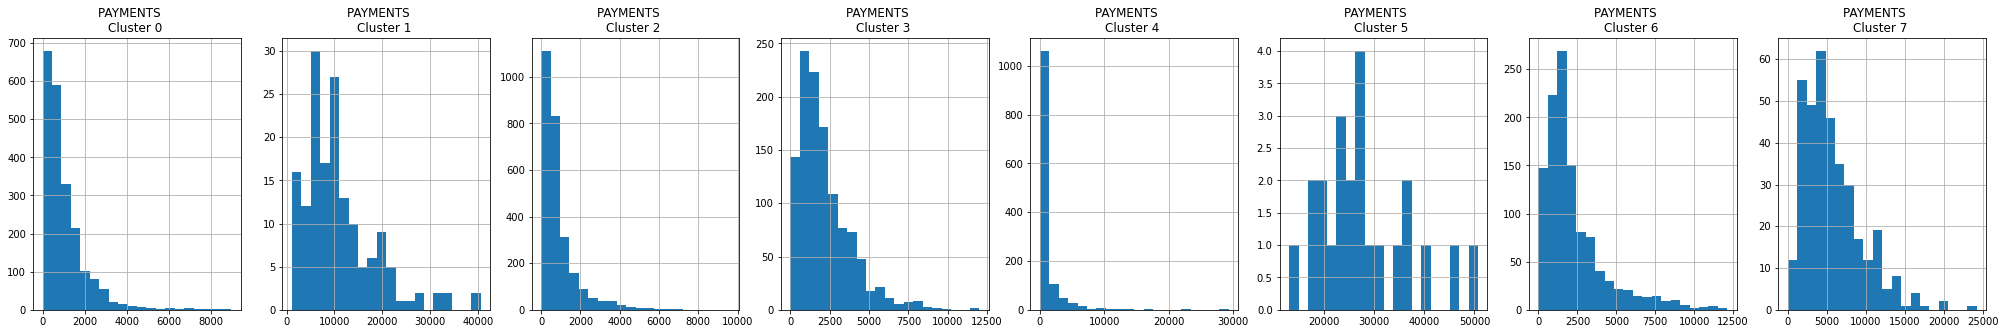

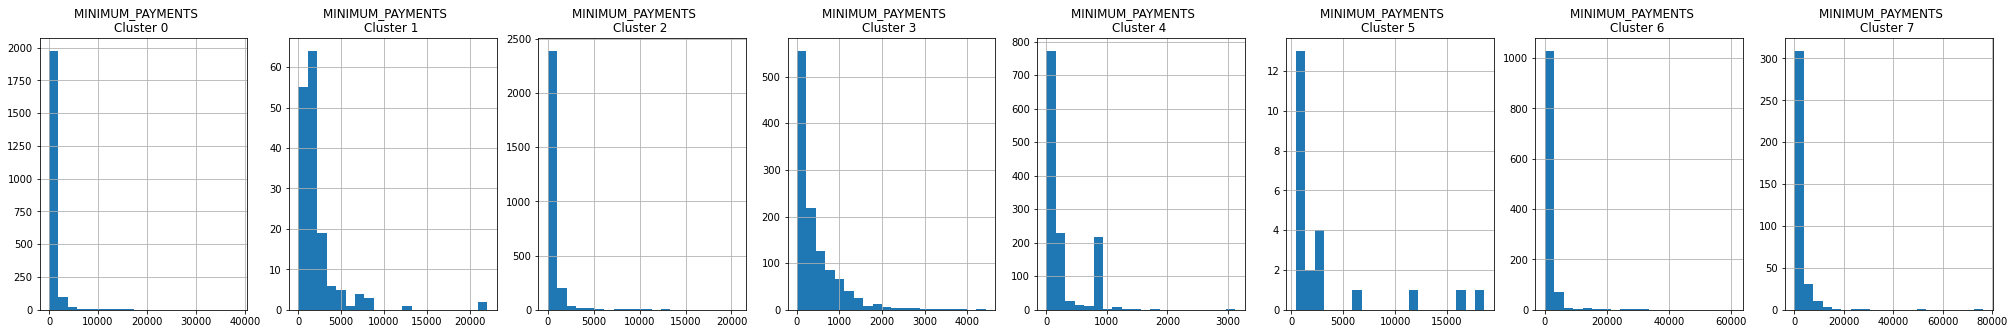

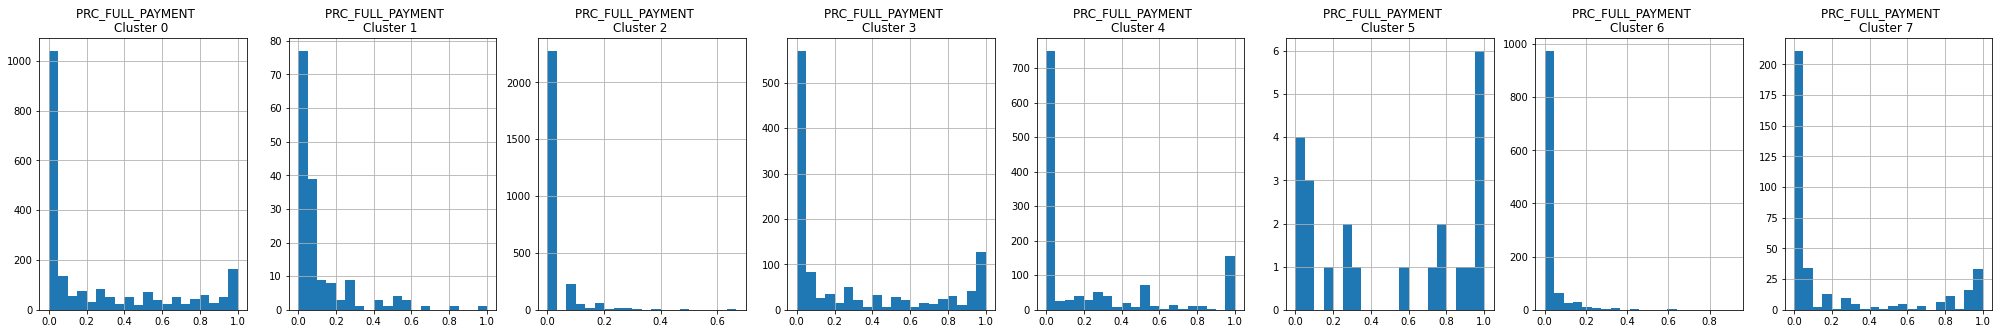

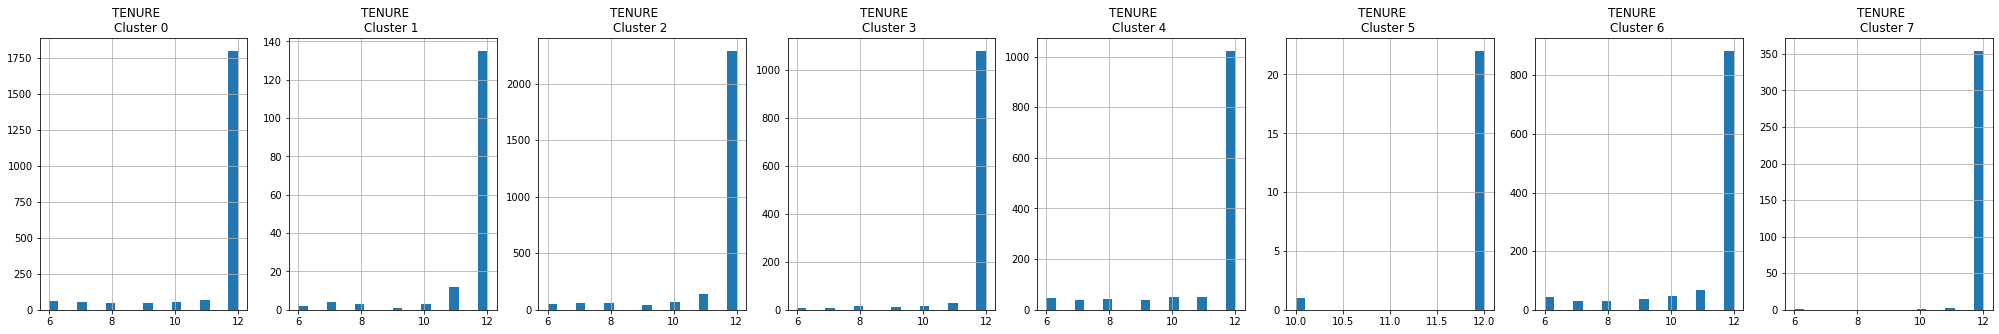

In [135]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_new[creditcard_df_new['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


PCA


In [137]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df)
principal_comp

array([[-4326.38395637,   921.5668839 ],
       [ 4118.91667599, -2432.8463473 ],
       [ 1497.90766006, -1997.57869196],
       ...,
       [-4379.44420243,   911.50456628],
       [-4791.11774446,  1032.54094369],
       [-3623.70274869,  1555.134769  ]])

In [138]:
pca_df = pd.DataFrame(data=principal_comp, columns=['PCA_1','PCA_2'])
pca_df.head()

,PCA_1,PCA_2
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659


In [139]:
pca_df_new = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df_new

,PCA_1,PCA_2,cluster
0,-4326.383956,921.566884,2
1,4118.916676,-2432.846347,6
2,1497.907660,-1997.578692,3
3,1394.548556,-1488.743450,2
4,-3743.351874,757.342659,2
...,...,...,...
8945,-4208.357938,1122.443274,0
8946,-4123.924001,951.683803,0
8947,-4379.444202,911.504566,0
8948,-4791.117744,1032.540944,2


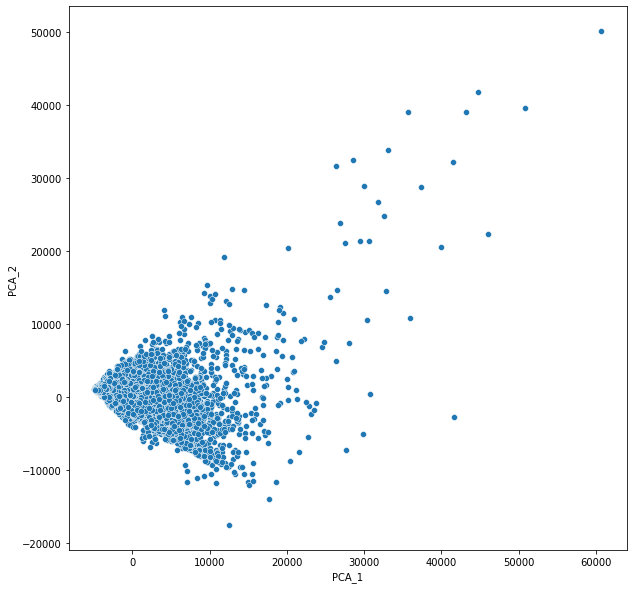

In [147]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x='PCA_1',y='PCA_2', data= pca_df, palette=['red','green','blue','gray','yellow','pink','purple','black'])
plt.show()

In [149]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA_1", y="PCA_2", hue = 'cluster', data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

ValueError: ignored

<Figure size 720x720 with 0 Axes>